In [10]:

import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
#check status code of the website
url = "https://www.goat.com/collections/top-100"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9",
    "Referer": "https://www.google.com/",
}

r = requests.get(url, headers=headers)

print("Status Code:", r.status_code)
print("r.ok:", r.ok)


Status Code: 200
r.ok: True


In [12]:
soup = BeautifulSoup(r.text)

In [13]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en-us">
 <head>
  <meta charset="utf-8"/>
  <link href="/images/icons/apple-touch-icon.png" rel="apple-touch-icon"/>
  <link href="/favicon.ico" rel="icon"/>
  <link href="/manifest.json" rel="manifest"/>
  <meta content="#000" name="theme-color"/>
  <meta content="summary_large_image" name="twitter:card"/>
  <meta content="width=device-width, initial-scale=1.0 maximum-scale=1.0" name="viewport"/>
  <meta content="/images/icons/goat-logo-512.png" property="og:image"/>
  <link href="https://www.goat.com/collections/top-100" hreflang="en-us" rel="alternate"/>
  <link href="https://www.goat.com/en-gb/collections/top-100" hreflang="en-gb" rel="alternate"/>
  <link href="https://www.goat.com/en-ca/collections/top-100" hreflang="en-ca" rel="alternate"/>
  <link href="https://www.goat.com/fr-ca/collections/top-100" hreflang="fr-ca" rel="alternate"/>
  <link href="https://www.goat.com/en-au/collections/top-100" hreflang="en-au" rel="alternate"/>
  <link href="https:

In [45]:
# Initialize Selenium WebDriver
service = Service()
driver = webdriver.Chrome(service=service)

# Lists to store extracted data
shoe_names = []
release_dates = []
prices = []
ranking = []
product_links = []

try:
    driver.get("https://www.goat.com/collections/top-100")
    driver.maximize_window()
    
    # Scroll down multiple times to load more products
    for _ in range(30):  
        driver.find_element(By.TAG_NAME, "body").send_keys(Keys.PAGE_DOWN)
        time.sleep(2)  # Allow time for new content to load

    # Wait until a specific product element is visible (this is a more precise way to wait)
    wait = WebDriverWait(driver, 15)
    product_container = wait.until(
        EC.presence_of_element_located((By.CLASS_NAME, "GridStyles__GridWrapper-sc-1cm482p-1"))
    )

    # Now that the page is fully loaded, get the page source
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, "html.parser")

    # Debugging: Print out the first 500 characters of the HTML to see the page structure
    print(soup.prettify()[:500])

    # Extract shoe names
    for product in soup.find_all('div', {'data-qa': 'grid_cell_product_name'}):
        name = product.get_text(strip=True)
        shoe_names.append(name)
    
    # Extract release dates
    for product in soup.find_all('div', {'data-qa': 'grid_cell_product_release_date'}):
        date = product.get_text(strip=True)
        release_dates.append(date)
    
    # Extract prices
    for product in soup.find_all('div', {'data-qa': 'grid_cell_product_price'}):
        price = product.find('span', class_='LocalizedCurrency__Amount-sc-yoa0om-0')
        if price:
            prices.append(price.get_text(strip=True))
        else:
            prices.append('N/A')
    
    # Extract rankings
    for product in soup.find_all('div', {'data-qa': 'grid_cell_product'}):
        rank = product.get('data-grid-cell-position')
        ranking.append(rank)
    
    # Extract product links
    for product in soup.find_all('div', {'data-qa': 'grid_cell_product'}):
        try:
            # Find the <a> tag and extract the 'href' attribute
            link = product.find('a', {'class': 'GridCellLink__Link-sc-2zm517-0 gIRmBZ'})
            if link:
                full_link = "https://www.goat.com" + link.get('href')
                product_links.append(full_link)
            else:
                product_links.append('None')
        except AttributeError:
            product_links.append('None')

finally:
    driver.quit()  # Ensure browser closes properly

print(f"Shoe Names Length: {len(shoe_names)}")
print(f"Release Dates Length: {len(release_dates)}")
print(f"Prices Length: {len(prices)}")
print(f"Ranking Length: {len(ranking)}")
print(f"Product Links Length: {len(product_links)}")



<html lang="en-us">
 <head>
  <meta charset="utf-8"/>
  <link href="/images/icons/apple-touch-icon.png" rel="apple-touch-icon"/>
  <link href="/favicon.ico" rel="icon"/>
  <link href="/manifest.json" rel="manifest"/>
  <meta content="#000" name="theme-color"/>
  <meta content="summary_large_image" name="twitter:card"/>
  <meta content="width=device-width, initial-scale=1.0 maximum-scale=1.0" name="viewport"/>
  <meta content="/images/icons/goat-logo-512.png" property="og:image"/>
  <link href="h
Shoe Names Length: 182
Release Dates Length: 182
Prices Length: 182
Ranking Length: 182
Product Links Length: 182


In [46]:
df = pd.DataFrame({'rank': ranking, 'shoe': shoe_names, 'price': prices, 'release_date': release_dates, 'product_link': product_links})
df 

,rank,shoe,price,release_date,product_link
0,1,Air Jordan 5 Retro OG 'Black Metallic Reimagined',$266,Feb 08,https://www.goat.com/sneakers/air-jordan-5-og-...
1,2,Air Jordan 3 Retro 'Black Cat' 2025,$231,Jan 11,https://www.goat.com/sneakers/air-jordan-3-ret...
2,3,Air Jordan 11 Retro 'Legend Blue / Columbia' 2024,$177,2024,https://www.goat.com/sneakers/air-jordan-11-re...
3,4,Gel 1130 'Black Pure Silver',$119,2023,https://www.goat.com/sneakers/gel-1130-black-p...
4,5,Air Jordan 12 Retro 'Flu Game' 2025,$249,Mar 01,https://www.goat.com/sneakers/air-jordan-12-re...
...,...,...,...,...,...
177,178,Air Zoom Pegasus 41 'Doernbecher 2025',$157,Jan 25,https://www.goat.com/sneakers/air-zoom-pegasus...
178,179,JJJJound x 993 Made in USA 'Mushroom',$377,Jan 16,https://www.goat.com/sneakers/jjjjound-x-993-m...
179,180,Zoom Kobe 5 GS 'Year of the Mamba - University...,$175,Jan 18,https://www.goat.com/sneakers/zoom-kobe-5-prot...
180,181,Wmns Air Max Muse 'Black Metallic Silver',$144,Jan 10,https://www.goat.com/sneakers/wmns-air-max-mus...


In [49]:
df["product_link"]


0      https://www.goat.com/sneakers/air-jordan-5-og-...
1      https://www.goat.com/sneakers/air-jordan-3-ret...
2      https://www.goat.com/sneakers/air-jordan-11-re...
3      https://www.goat.com/sneakers/gel-1130-black-p...
4      https://www.goat.com/sneakers/air-jordan-12-re...
                             ...                        
177    https://www.goat.com/sneakers/air-zoom-pegasus...
178    https://www.goat.com/sneakers/jjjjound-x-993-m...
179    https://www.goat.com/sneakers/zoom-kobe-5-prot...
180    https://www.goat.com/sneakers/wmns-air-max-mus...
181    https://www.goat.com/sneakers/air-zoom-vomero-...
Name: product_link, Length: 182, dtype: object

In [36]:
service = Service()
driver = webdriver.Chrome(service=service)


driver.get("https://www.goat.com/sneakers/air-jordan-5-og-metallic-2025-hf3975-001")
time.sleep(3)

html_content = driver.page_source
soup = BeautifulSoup(html_content, 'html.parser')


facts = soup.find_all("div", {"class": "Window-sc-12xj74n-0 kMExiK FactsWindow__Window-sc-1hjbbqw-0"})
print(facts)

driver.quit()

[]


In [51]:
import time
import pandas as pd
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup

# Setup Chrome with stealth features
options = uc.ChromeOptions()
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36")
options.add_argument("--disable-blink-features=AutomationControlled")
driver = uc.Chrome(options=options)


data = {i: [] for i in range(9)}

# Loop through product links
for link in df["product_link"]:
    try:
        driver.get(link)

        # Wait for the Facts button
        WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.CSS_SELECTOR, 'button[data-qa="product_template_facts"]'))
        )

        # Click the Facts button
        facts_button = driver.find_element(By.CSS_SELECTOR, 'button[data-qa="product_template_facts"]')
        facts_button.click()

        # Wait for facts section to load
        WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CLASS_NAME, "window-item"))
        )

        # Get and parse the HTML
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        facts = soup.find_all("div", class_="WindowItemShortText__Wrapper-sc-jrzdw-0 keXHXG window-item")

        for index, fact in enumerate(facts):
            if index not in data:
                data[index] = []
            data[index].append(fact.text.strip())

        # Add empty strings if fewer than 9 facts
        for i in range(len(facts), 9):
            data[i].append("")

        print(f"✅ Scraped: {link}")

        time.sleep(5)  # brief human-like delay between requests

    except Exception as e:
        print(f"❌ Skipped {link} due to error: {e}")
        for i in range(9):
            data[i].append("")

# Close the driver
driver.quit()

# Save to DataFrame and CSV
df_full = pd.DataFrame(data)
df_full.to_csv("goat_factsfull.csv", index=False)


✅ Scraped: https://www.goat.com/sneakers/air-jordan-5-og-metallic-2025-hf3975-001
✅ Scraped: https://www.goat.com/sneakers/air-jordan-3-retro-black-cat-2025-ct8532-001
✅ Scraped: https://www.goat.com/sneakers/air-jordan-11-retro-columbia-2024-ct8012-104
✅ Scraped: https://www.goat.com/sneakers/gel-1130-black-pure-silver-1201a906-001
✅ Scraped: https://www.goat.com/sneakers/air-jordan-12-retro-flu-game-2025-ct8013-002
✅ Scraped: https://www.goat.com/sneakers/travis-scott-x-air-jordan-1-low-og-sp-velvet-brown-dm7866-202
✅ Scraped: https://www.goat.com/sneakers/air-jordan-3-retro-black-cement-reimagined-dn3707-010
✅ Scraped: https://www.goat.com/sneakers/air-jordan-1-retro-high-og-black-toe-reimagined-dz5485-061
✅ Scraped: https://www.goat.com/sneakers/air-jordan-1-retro-high-85-og-bred-2025-hv6675-067
✅ Scraped: https://www.goat.com/sneakers/air-jordan-5-retro-og-gs-metallic-2025-hf3976-001
✅ Scraped: https://www.goat.com/sneakers/9060-black-grey-u9060zge
✅ Scraped: https://www.goat.com/

In [50]:
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup

# Start the driver
service = Service()
driver = webdriver.Chrome(service=service)

data = {
        0: [],
        1: [],
        2: [],
        3: [],
        4: [],
        5: [],
        6: [],
        7: [],
        8: []
    }


for link in df["product_link"]:
    # Go to the page
    driver.get(link)
    time.sleep(3)  # wait for page to load

    # Click the "Facts" button
    facts_button = driver.find_element(By.CSS_SELECTOR, 'button[data-qa="product_template_facts"]')
    facts_button.click()
    time.sleep(2)  # wait for facts content to load

    # Get updated HTML and parse
    html_content = driver.page_source
    soup = BeautifulSoup(html_content, 'html.parser')



# Now look for the facts content
    facts = soup.find_all("div", {"class": "WindowItemShortText__Wrapper-sc-jrzdw-0 keXHXG window-item"})
    for index, fact in enumerate(facts):
        if index not in data: 
            data[index] = []
        data[index].append(fact.text.strip())


# Quit the driver
driver.quit()


df_full = pd.DataFrame(data)

df_full.to_csv("goat_factsfull.csv", index=False)


NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"button[data-qa="product_template_facts"]"}
  (Session info: chrome=135.0.7049.85); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
0   chromedriver                        0x000000010eced498 chromedriver + 6149272
1   chromedriver                        0x000000010ece4b5a chromedriver + 6114138
2   chromedriver                        0x000000010e775e80 chromedriver + 417408
3   chromedriver                        0x000000010e7c7587 chromedriver + 750983
4   chromedriver                        0x000000010e7c77a1 chromedriver + 751521
5   chromedriver                        0x000000010e817784 chromedriver + 1079172
6   chromedriver                        0x000000010e7ed7bd chromedriver + 907197
7   chromedriver                        0x000000010e814aca chromedriver + 1067722
8   chromedriver                        0x000000010e7ed563 chromedriver + 906595
9   chromedriver                        0x000000010e7b9955 chromedriver + 694613
10  chromedriver                        0x000000010e7ba5b1 chromedriver + 697777
11  chromedriver                        0x000000010ecaaf50 chromedriver + 5877584
12  chromedriver                        0x000000010ecaee41 chromedriver + 5893697
13  chromedriver                        0x000000010ec85394 chromedriver + 5723028
14  chromedriver                        0x000000010ecaf85b chromedriver + 5896283
15  chromedriver                        0x000000010ec73b14 chromedriver + 5651220
16  chromedriver                        0x000000010ecd2968 chromedriver + 6039912
17  chromedriver                        0x000000010ecd2b30 chromedriver + 6040368
18  chromedriver                        0x000000010ece4721 chromedriver + 6113057
19  libsystem_pthread.dylib             0x00007ff80c08a18b _pthread_start + 99
20  libsystem_pthread.dylib             0x00007ff80c085ae3 thread_start + 15


In [ ]:
data = {
"release_dates": [],
"skus": [],
"designers": [],
"nicknames": [],
"colorways": [],
"maincolors": [],
"uppermaterials": [],
"technologies": [],
"categories": []}

In [44]:
df = pd.DataFrame({'rank': ranking, 'shoe': shoe_names, 'price': prices, 'release_date': release_dates, 'product_link': product_links})
df 

ValueError: All arrays must be of the same length

In [ ]:
#Save the dataframe to a csv file
df.to_csv('GOAT_top_100.csv', index=False)

In [8]:
df["price"] = df["price"].replace('[\$,]', '', regex=True).astype(float)

df["price"].describe()


<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/var/folders/s5/w23ysbrd4mb00w78_80t58tm0000gn/T/ipykernel_41254/3521910332.py:1: SyntaxWarning: invalid escape sequence '\$'
  df["price"] = df["price"].replace('[\$,]', '', regex=True).astype(float)
/var/folders/s5/w23ysbrd4mb00w78_80t58tm0000gn/T/ipykernel_41254/3521910332.py:1: SyntaxWarning: invalid escape sequence '\$'
  df["price"] = df["price"].replace('[\$,]', '', regex=True).astype(float)


NameError: name 'df' is not defined

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/var/folders/s5/w23ysbrd4mb00w78_80t58tm0000gn/T/ipykernel_13597/2568550962.py:2: SyntaxWarning: invalid escape sequence '\$'
  df["price"] = df["price"].replace('[\$,]', '', regex=True).astype(float)


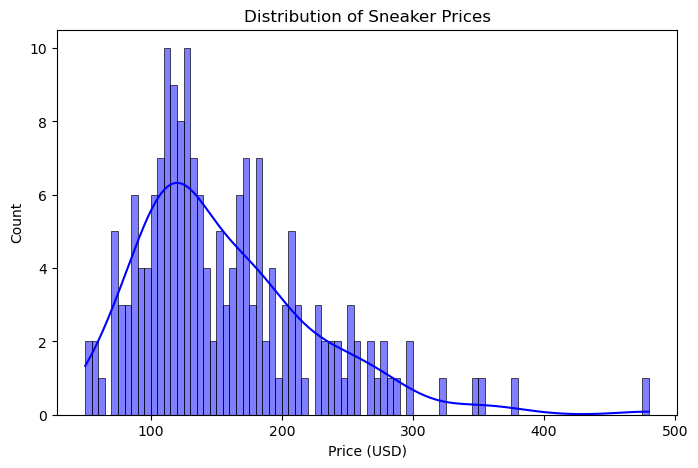

<Figure size 640x480 with 0 Axes>

In [17]:
# Convert price column to numeric (remove '$' and convert to float)
df["price"] = df["price"].replace('[\$,]', '', regex=True).astype(float)

# Plot histogram of sneaker prices in $5 bins with trend line
plt.figure(figsize=(8, 5))
sns.histplot(df["price"], bins=range(int(df["price"].min()), int(df["price"].max()) + 5, 5), kde=True, color="blue")
plt.xlabel("Price (USD)")
plt.ylabel("Count")
plt.title("Distribution of Sneaker Prices")
plt.show()

plt.savefig('sneaker_prices.png')

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/var/folders/s5/w23ysbrd4mb00w78_80t58tm0000gn/T/ipykernel_13597/1878315941.py:2: SyntaxWarning: invalid escape sequence '\$'
  df["price"] = df["price"].replace('[\$,]', '', regex=True).astype(float)  # Convert price


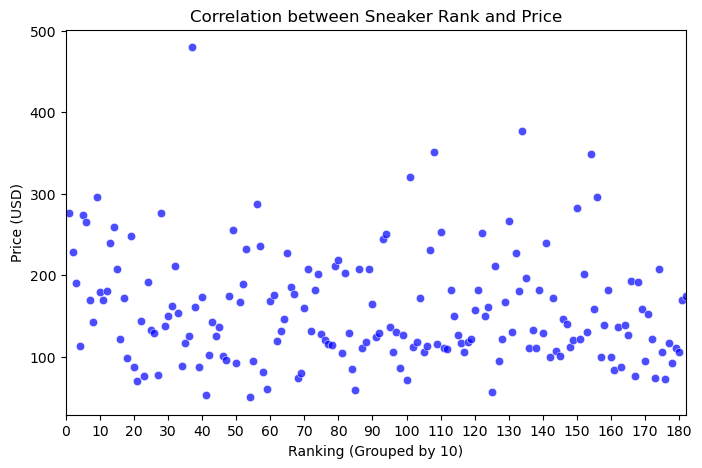

Correlation between Rank and Price: -0.13


<Figure size 640x480 with 0 Axes>

In [13]:
df["rank"] = pd.to_numeric(df["rank"], errors="coerce")  # Convert rank to numeric
df["price"] = df["price"].replace('[\$,]', '', regex=True).astype(float)  # Convert price

# Scatter plot of ranking vs. price with x-axis tick marks every 10
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["rank"], y=df["price"], color="blue", alpha=0.7)

# Get max rank and ensure x-axis extends fully
max_rank = int(df["rank"].max())
plt.xticks(np.arange(0, max_rank + 1, 10))  # Ensure tick marks go up to 182
plt.xlim(0, max_rank)  # Force x-axis to go up to max rank

plt.xlabel("Ranking (Grouped by 10)")
plt.ylabel("Price (USD)")
plt.title("Correlation between Sneaker Rank and Price")
plt.show()

# Compute correlation
correlation = df["rank"].corr(df["price"])
print(f"Correlation between Rank and Price: {correlation:.2f}")

plt.savefig('rank_price_corr.png')

In [32]:
url2 = "https://www.goat.com/sneakers/air-jordan-5-og-metallic-2025-hf3975-001"

requests.get(url2, headers=headers)

# Make into soup object
soup2 = BeautifulSoup(r.text, "html.parser")

# Search soup for everything within the <div> tag with class = FactsWindow__Wrapper-sc-1hjbbqw-1 dnjWGj

facts = soup2.find_all("div", {"class": "ProductInfo__InternalContainer-sc-yvcr9v-3"})
print(facts)

[]


In [16]:

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
from time import sleep

# Setup Selenium WebDriver using the correct Service class
service = Service(ChromeDriverManager().install())  # Use the Service class to pass the driver
driver = webdriver.Chrome(service=service)

# Open the page
url = "https://www.goat.com/sneakers/air-jordan-5-og-metallic-2025-hf3975-001"
driver.get(url)

# Wait until the table is present on the page (instead of using sleep)
wait = WebDriverWait(driver, 10)
table = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, 'table[data-qa="facts_container"]')))

# Extract all rows from the table
rows = table.find_elements(By.TAG_NAME, "tr")

# Create a dictionary to hold the key-value pairs
table_data = {}

# Loop through the rows and extract key-value pairs
for row in rows:
    try:
        key = row.find_element(By.CLASS_NAME, "factsTableKey").text.strip()
        value = row.find_element(By.CLASS_NAME, "factsTableValue").text.strip()
        
        # If the value contains a link, extract the URL
        link = row.find_elements(By.TAG_NAME, "a")
        if link:
            value = link[0].get_attribute("href")  # Get the URL of the link
        
        table_data[key] = value
    except Exception as e:
        print(f"Error extracting data from row: {e}")

# Close the WebDriver
driver.quit()

# Print the extracted data
for key, value in table_data.items():
    print(f"{key}: {value}")



TimeoutException: Message: 
Stacktrace:
0   chromedriver                        0x000000010efd4498 chromedriver + 6149272
1   chromedriver                        0x000000010efcbb5a chromedriver + 6114138
2   chromedriver                        0x000000010ea5ce80 chromedriver + 417408
3   chromedriver                        0x000000010eaae587 chromedriver + 750983
4   chromedriver                        0x000000010eaae7a1 chromedriver + 751521
5   chromedriver                        0x000000010eafe784 chromedriver + 1079172
6   chromedriver                        0x000000010ead47bd chromedriver + 907197
7   chromedriver                        0x000000010eafbaca chromedriver + 1067722
8   chromedriver                        0x000000010ead4563 chromedriver + 906595
9   chromedriver                        0x000000010eaa0955 chromedriver + 694613
10  chromedriver                        0x000000010eaa15b1 chromedriver + 697777
11  chromedriver                        0x000000010ef91f50 chromedriver + 5877584
12  chromedriver                        0x000000010ef95e41 chromedriver + 5893697
13  chromedriver                        0x000000010ef6c394 chromedriver + 5723028
14  chromedriver                        0x000000010ef9685b chromedriver + 5896283
15  chromedriver                        0x000000010ef5ab14 chromedriver + 5651220
16  chromedriver                        0x000000010efb9968 chromedriver + 6039912
17  chromedriver                        0x000000010efb9b30 chromedriver + 6040368
18  chromedriver                        0x000000010efcb721 chromedriver + 6113057
19  libsystem_pthread.dylib             0x00007ff80c08a18b _pthread_start + 99
20  libsystem_pthread.dylib             0x00007ff80c085ae3 thread_start + 15


In [56]:
import pandas as pd
import re

# Load your CSV file — replace with your actual file path if needed
df = pd.read_csv('goat_factsfull.csv', header=None)

# Define the list of expected variable names (based on your data)
variables = [
    "Release Date", "SKU", "Designer", "Nickname", "Colorway",
    "Main Color", "Upper Material", "Technology", "Category"
]

# Function to extract value from "VariableNameValue"
def extract_value(cell):
    if pd.isna(cell):
        return {}
    result = {}
    for var in variables:
        if var in str(cell):
            value = str(cell).replace(var, '', 1).strip()
            result[var] = value
    return result

# Apply extraction across the whole DataFrame
extracted_rows = []
for _, row in df.iterrows():
    row_data = {var: None for var in variables}
    for cell in row:
        cell_data = extract_value(cell)
        row_data.update(cell_data)
    extracted_rows.append(row_data)

# Convert to a clean DataFrame
clean_df = pd.DataFrame(extracted_rows)

# Optional: Reorder columns
clean_df = clean_df[variables]

# Save to CSV
clean_df.to_csv('goat_clean.csv', index=False)

print(clean_df)


    Release Date           SKU         Designer  \
0           None          None             None   
1     02-08-2025    HF3975 001  Tinker Hatfield   
2     01-11-2025    CT8532 001  Tinker Hatfield   
3     12-14-2024    CT8012 104  Tinker Hatfield   
4     05-31-2023  1201A906 001             None   
..           ...           ...              ...   
178   01-25-2025    IB6096 920             None   
179   01-16-2025        U993JJ             None   
180   01-18-2025    HM3753 600        Eric Avar   
181   01-10-2025    FV1920 001             None   
182   01-08-2025    HV5171 121             None   

                               Nickname  \
0                                  None   
1             Black Metallic Reimagined   
2                             Black Cat   
3                Legend Blue / Columbia   
4                     Black Pure Silver   
..                                  ...   
178                    Doernbecher 2025   
179                            Mushroom   


/var/folders/s5/w23ysbrd4mb00w78_80t58tm0000gn/T/ipykernel_41254/1484947554.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=color_counts, x='Main Color', y='Count', palette='viridis')


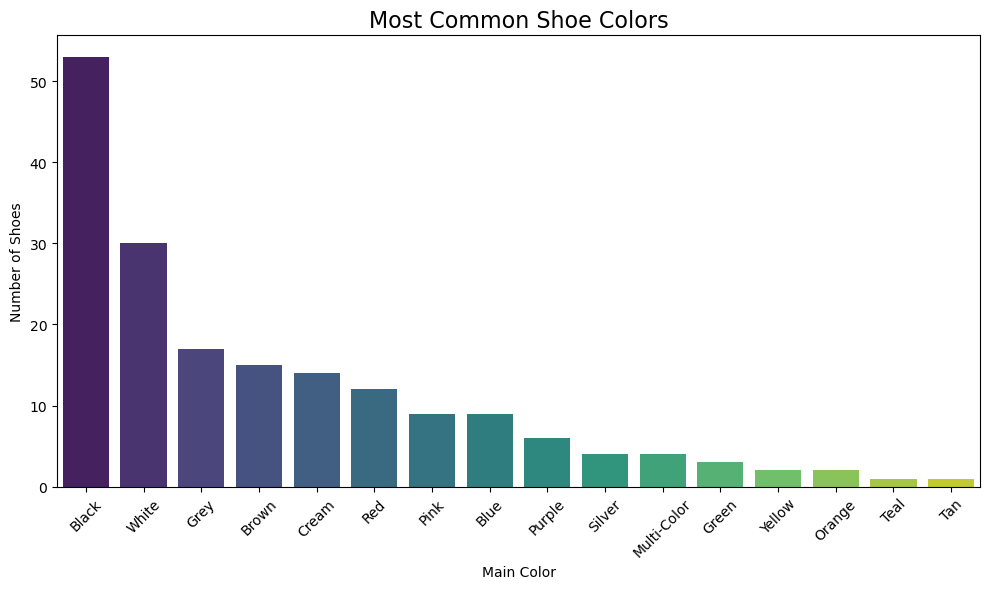

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned dataset
df = pd.read_csv("cleaned_dataset.csv")

# Count each Main Color
color_counts = df['Main Color'].value_counts().reset_index()
color_counts.columns = ['Main Color', 'Count']

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=color_counts, x='Main Color', y='Count', palette='viridis')
plt.title("Most Common Shoe Colors", fontsize=16)
plt.ylabel("Number of Shoes")
plt.xlabel("Main Color")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/s5/w23ysbrd4mb00w78_80t58tm0000gn/T/ipykernel_41254/1816546653.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=designer_counts, x='Designer', y='Count', palette='magma')


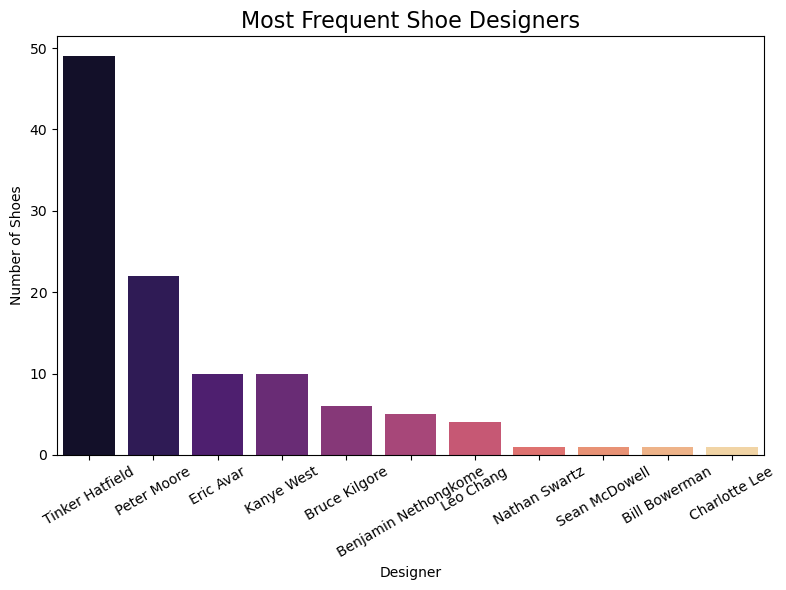

In [58]:
designer_counts = df['Designer'].value_counts().reset_index()
designer_counts.columns = ['Designer', 'Count']

plt.figure(figsize=(8,6))
sns.barplot(data=designer_counts, x='Designer', y='Count', palette='magma')
plt.title("Most Frequent Shoe Designers", fontsize=16)
plt.ylabel("Number of Shoes")
plt.xlabel("Designer")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


/var/folders/s5/w23ysbrd4mb00w78_80t58tm0000gn/T/ipykernel_41254/3803830585.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release Date'] = pd.to_datetime(df['Release Date'])


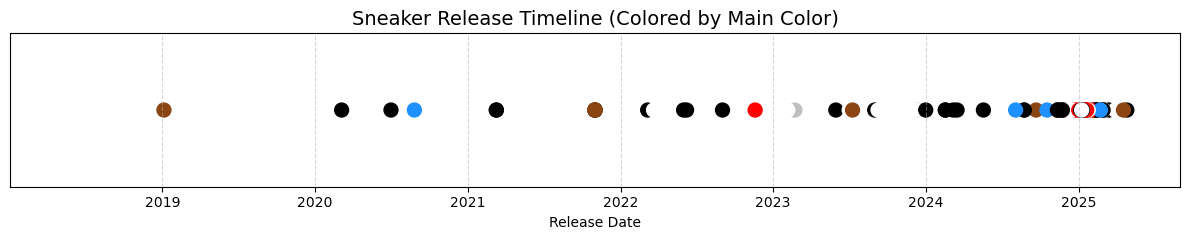

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("cleaned_dataset.csv")

# Convert release date
df['Release Date'] = pd.to_datetime(df['Release Date'])

# Define real-world hex color mappings
color_map = {
    'Black': '#000000',
    'White': '#FFFFFF',
    'Red': '#FF0000',
    'Brown': '#8B4513',
    'Blue': '#1E90FF',
    'Silver': '#C0C0C0',
    # Add more if your dataset expands
}

# Filter only known colors for mapping
df = df[df['Main Color'].isin(color_map.keys())]

# Plot
plt.figure(figsize=(12, 2.5))
plt.scatter(df['Release Date'], [1]*len(df), c=df['Main Color'].map(color_map), s=100)

# Aesthetics
plt.title("Sneaker Release Timeline (Colored by Main Color)", fontsize=14)
plt.yticks([])  # Hide y-axis
plt.xlabel("Release Date")
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()



In [63]:
df.head()

,rank,shoe,price,Release Date,SKU,Designer,Nickname,Colorway,Main Color,Upper Material,Technology,Category
0,1,Air Jordan 5 Retro OG 'Black Metallic Reimagined',276,2/8/25,HF3975 001,Tinker Hatfield,Black Metallic Reimagined,Black/White/Metallic Silver/Fire Red,Black,Nubuck,Air,Lifestyle
1,2,Air Jordan 3 Retro 'Black Cat' 2025,228,1/11/25,CT8532 001,Tinker Hatfield,Black Cat,Black/Dark Charcoal/Black,Black,Suede,Air,Lifestyle
2,3,Air Jordan 11 Retro 'Legend Blue / Columbia' 2024,190,12/14/24,CT8012 104,Tinker Hatfield,Legend Blue / Columbia,White/Legend Blue/Black,White,Patent Leather,Air,Lifestyle
3,4,Gel 1130 'Black Pure Silver',113,5/31/23,1201A906 001,NaN,Black Pure Silver,Black/Pure Silver,Black,Mesh,Gel,Lifestyle
4,5,Air Jordan 12 Retro 'Flu Game' 2025,274,3/1/25,CT8013 002,Tinker Hatfield,Flu Game,Black/Varsity Red,Black,Leather,Zoom Air,Lifestyle
